<a href="https://colab.research.google.com/github/BautistaDavid/Machine-Learning-Class-2022/blob/main/Proyecto_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PCA y Clustering puntajes por competencia SaberPro Economía**

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import seaborn as sns 


Se importan los datos extraídos del proyecto 7 

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/BautistaDavid/Machine-Learning-Class-2022/main/data/data_pca.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head(2)

,mod_razona_cuantitat_punt,mod_lectura_critica_punt,mod_competen_ciudada_punt,mod_ingles_punt,mod_comuni_escrita_punt,percentil_global,mod_razona_cuantitat_desem,mod_lectura_critica_desem,mod_competen_ciudada_desem,mod_comuni_escrita_desem,punt_global
0,207,151,186,300,159,99,4,2,3,3.0,201
1,201,192,206,210,300,100,3,3,4,4.0,222


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   mod_razona_cuantitat_punt   3855 non-null   int64  
 1   mod_lectura_critica_punt    3855 non-null   int64  
 2   mod_competen_ciudada_punt   3855 non-null   int64  
 3   mod_ingles_punt             3855 non-null   int64  
 4   mod_comuni_escrita_punt     3855 non-null   int64  
 5   percentil_global            3855 non-null   int64  
 6   mod_razona_cuantitat_desem  3855 non-null   int64  
 7   mod_lectura_critica_desem   3855 non-null   int64  
 8   mod_competen_ciudada_desem  3855 non-null   int64  
 9   mod_comuni_escrita_desem    3855 non-null   float64
 10  punt_global                 3855 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 331.4 KB


## **PCA**

In [6]:
X = df.to_numpy()
scal = StandardScaler()
X_scal = scal.fit_transform(X)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scal)
# pca_2 = pd.DataFrame(X_pca, columns=['PC1','PC2'])

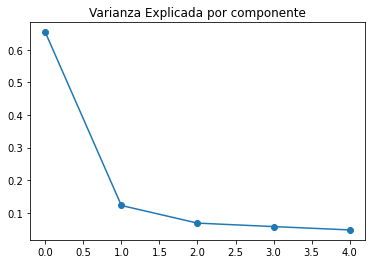

In [7]:
plt.title('Varianza Explicada por componente')
plt.plot(range(5),pca.explained_variance_ratio_,)
plt.scatter(range(5),pca.explained_variance_ratio_)
plt.show()

In [8]:
# seleccionamos solo dos componenetes 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scal)
pca_2 = pd.DataFrame(X_pca, columns=['PC1','PC2'])

In [9]:
pca_2.head()

,PC1,PC2
0,-3.152727,-0.107988
1,-4.655597,2.547721
2,5.998306,-0.964266
3,0.059365,-2.314325
4,-0.300223,-1.311800


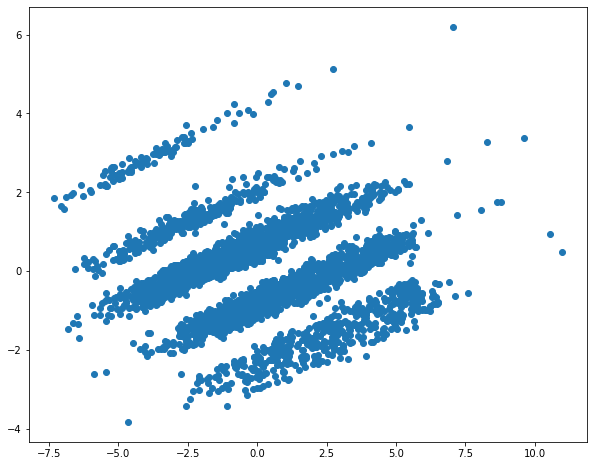

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(pca_2['PC1'],pca_2['PC2'])

## **Clustering con Kmeans**

In [11]:
scores = []
for i in range(2,9):
  kmeans = KMeans(n_clusters=i, random_state=777,algorithm='elkan').fit(X_scal)
  labels = kmeans.labels_
  scores.append(davies_bouldin_score(X_scal, labels))

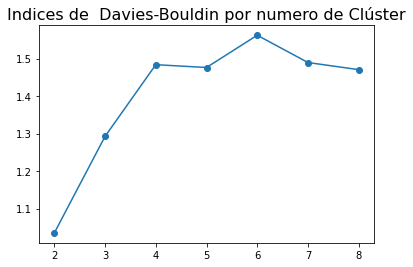

In [12]:
plt.title('Indices de  Davies-Bouldin por numero de Clúster',fontsize=16)
plt.plot(range(2,9),scores)
plt.scatter(range(2,9),scores)
plt.xticks(range(2,9))
plt.show()

In [13]:
kmeans = KMeans(n_clusters=2, random_state=777,algorithm='elkan').fit(X_scal)
pca_2['labels'] = kmeans.labels_ 

In [14]:
pca_2['labels'] = kmeans.labels_ 

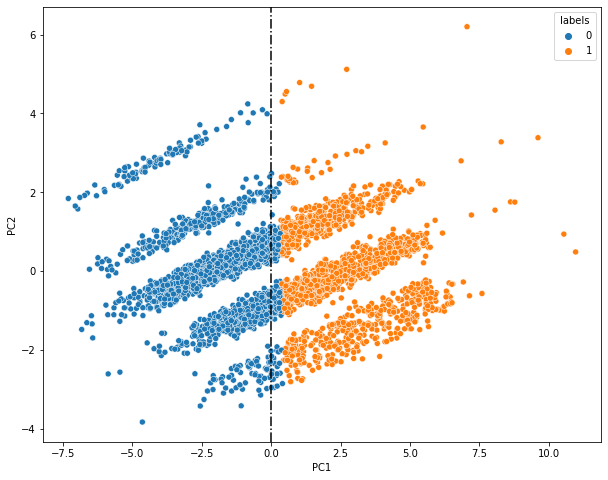

In [15]:
plt.figure(figsize = (10,8))
# plt.title()
plt.axvline(0,color='black',linestyle='-.')
sns.scatterplot(data=pca_2,x='PC1',y='PC2',hue = 'labels')

davies_bouldin_score = 1.0350521968648352


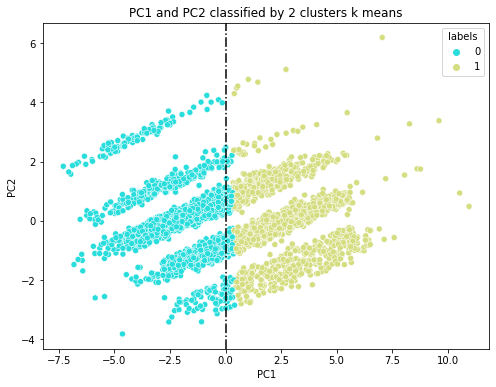

----------------------------------------------------------------------------------------------------
 
davies_bouldin_score = 1.292452593632541


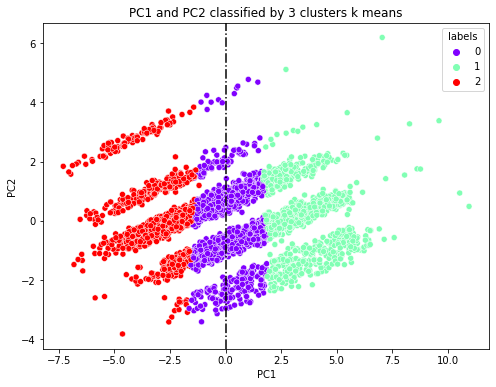

----------------------------------------------------------------------------------------------------
 
davies_bouldin_score = 1.4835758591440662


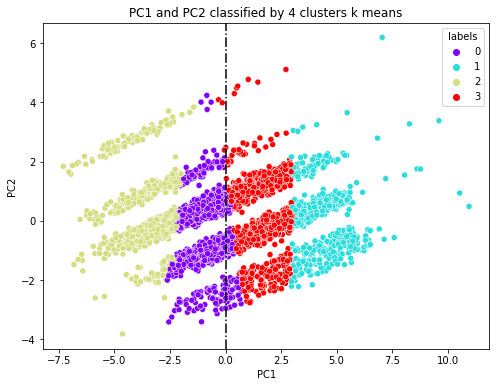

----------------------------------------------------------------------------------------------------
 
davies_bouldin_score = 1.4760724319973342


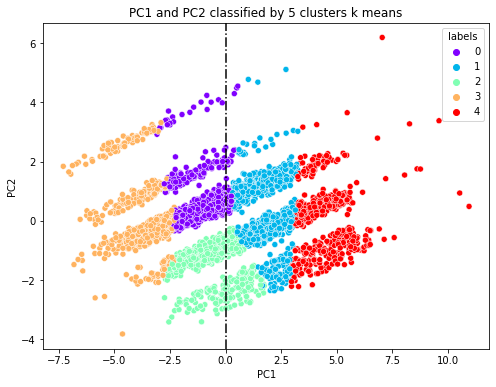

----------------------------------------------------------------------------------------------------
 
davies_bouldin_score = 1.5620741305016288


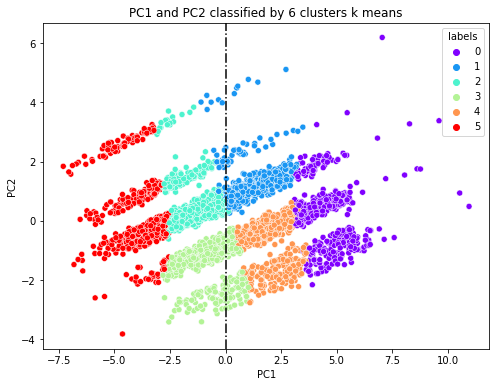

----------------------------------------------------------------------------------------------------
 
davies_bouldin_score = 1.4893232826054204


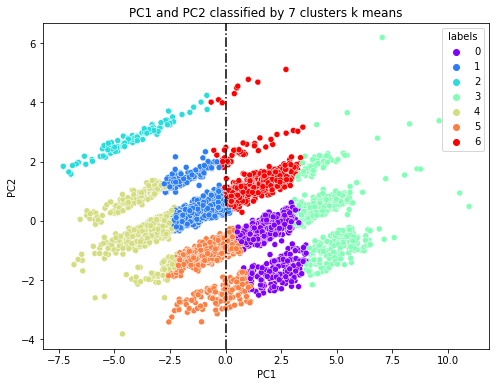

----------------------------------------------------------------------------------------------------
 
davies_bouldin_score = 1.4703572650609025


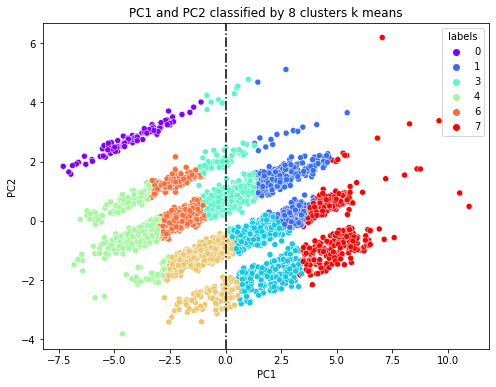

----------------------------------------------------------------------------------------------------
 


In [17]:
scores = []
for i in range(2,9):
  kmeans = KMeans(n_clusters=i, random_state=777,algorithm='elkan').fit(X_scal)
  labels = kmeans.labels_
  score = davies_bouldin_score(X_scal, labels)
  scores.append(score)
  print(f'davies_bouldin_score = {score}')
  pca_2['labels'] = kmeans.labels_ 
  

  plt.figure(figsize = (8,6))
  plt.title(f'PC1 and PC2 classified by {i} clusters k means') 
  plt.axvline(0,color='black',linestyle='-.')
  sns.scatterplot(data=pca_2,x='PC1',y='PC2',hue = 'labels',palette='rainbow')
  plt.show()
  print('-----'*20)
  print(' ')